# <center> Analisa Data Wireless Sensor Network di Kawasan UKM Gula Trangkil </center>
<center>Mukhamad Nurkamid<sup>1</sup>, Firman Adi Nur Fatin<sup>2</sup></center>

## 1. Import Modul Python yang diperlukan
Modul yang diperlukan antara lain:
- NumPy, merupakan singkatan dari _Numerical Python_ adalah library python yang digunakan untuk bekerja dengan array dan juga memiliki fungsi yang bekerja dalam domain aljabar linier, transformasi fourier, dan matriks.
- Pandas, digunakan untuk memanipulasi data, seperti proses membaca data dari berbagai format (xlsx., csv., txt., dan lain sebagainya).
- Matplotlib, adalah suatu library atau package yang paling populer di bahasa python untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih. Setiap sumbu memiliki sumbu horizontal (x) dan sumbu vertikal (y).
- Seaborn, adalah library untuk membuat grafik dan statistik dengan menggunakan Python. Library ini dibangun berdasarkan library Matplotlib yang sudah ada. Kemudian terintegrasi dengan struktur data pada Pandas.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Buat DataFrame untuk Menampung Data Excel
Format DataFrame dipilih karena memungkinkan untuk memproses data secara tabular dengan logika baris dan kolom. Kita akan menampilkan 5 data teratas dan 5 data terbawah.

### 2.1 Trangkil
Data pertama yang akan diproses adalah data WSN dari kawasan Trangkil.

In [112]:
trangkil = pd.read_excel("data_trangkil.xlsx")

#### 2.1.1 Menampilkan 5 Data Pertama
_DataFrame_ mempunyai fungsi untuk menampilkan 5 data pertama dengan fungsi ```head()```.

In [113]:
trangkil.head()

,Date,Waktu,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5),Adc CO,Adc NH3,Adc NO2,adc co3,adc co2
0,2022-07-26,10:22:43,0.0,1,0.0,475.33,29.9,61.6,3.08,0.3,31.2,149.5,1.86,1,1316.2,1424.6,14731.0,6674.0,12529.0
1,2022-07-26,10:26:21,0.0,1,0.0,475.33,30.0,61.2,0.00,3.8,32.6,150.6,0.52,1,1310.2,1424.4,9456.0,5597.0,12477.0
2,2022-07-26,10:30:50,0.0,1,0.0,475.96,30.3,60.6,0.00,2.3,30.9,150.9,1.58,1,1308.2,1435.2,11632.0,6889.0,12460.0
3,2022-07-26,10:35:25,0.0,1,0.0,477.16,30.4,61.3,0.00,0.0,30.1,144.1,1.57,1,1299.2,1456.4,15642.0,7520.0,12801.0
4,2022-07-26,10:40:00,0.0,1,0.0,477.85,30.5,60.5,0.00,0.0,30.4,139.4,1.53,1,1290.8,1467.0,17113.0,7244.0,13036.0


#### 2.1.2 Menampilkan 5 Data Terakhir
Fungsi untuk menampilkan 5 data terakhir pada _DataFrame_ adalah fungsi ```tail()```.

In [114]:
trangkil.tail()

,Date,Waktu,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5),Adc CO,Adc NH3,Adc NO2,adc co3,adc co2
8740,2022-08-19,10:44:42,0.0,1,4.89,591.73,37.4,47.3,0.90,0.0,23.3,11.4,4.56,1,1725.3,3451.3,18699.0,12613.0,14371.0
8741,2022-08-19,10:47:12,0.0,1,4.84,594.66,37.4,47.6,0.18,0.0,24.2,12.4,2.67,1,1724.7,3496.9,15873.0,11888.0,13873.0
8742,2022-08-19,10:49:42,0.0,1,4.92,590.01,37.7,47.8,0.18,0.0,24.7,11.2,3.00,1,1723.6,3417.8,17702.0,11564.0,14448.0
8743,2022-08-19,10:52:12,0.0,1,4.84,597.25,37.9,47.3,0.18,0.0,26.7,12.2,3.93,1,1726.0,3546.1,18347.0,10047.0,13939.0
8744,2022-08-19,10:54:42,0.0,1,4.92,590.59,37.7,47.8,0.00,0.0,25.5,12.4,4.71,1,1725.8,3430.5,16972.0,10941.0,13862.0


#### 2.1.3 Menampilkan Detail Data
Fungsi ```describe()``` digunakan untuk menampilkan jumlah, mean, standar deviasi, nilai minumum, hingga maksimum dari suatu data.

In [115]:
trangkil.describe()

,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5),Adc CO,Adc NH3,Adc NO2,adc co3,adc co2
count,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8744.000000,8744.000000,8743.000000,8743.000000
mean,0.000240,1.000229,4.947046,557.699373,29.695666,73.055678,0.082274,0.437976,26.971264,10.655197,2.283228,1.000229,1716.052361,2858.625469,16421.407937,9845.921423,14796.730756
std,0.016737,0.015122,2.988367,18.317393,4.112515,13.621197,0.405046,1.098228,5.135079,6.593035,1.769213,0.015122,144.177190,319.160499,2837.253856,3851.384103,2423.460951
min,0.000000,1.000000,0.000000,475.330000,23.300000,31.800000,0.000000,0.000000,13.700000,0.000000,0.260000,1.000000,1271.600000,1424.400000,3150.000000,0.000000,5738.000000
25%,0.000000,1.000000,3.220000,542.260000,26.300000,61.900000,0.000000,0.000000,23.600000,7.100000,1.560000,1.000000,1660.800000,2588.875000,14949.750000,6912.000000,13208.000000
50%,0.000000,1.000000,5.480000,561.140000,28.600000,78.300000,0.000000,0.000000,26.800000,9.400000,1.740000,1.000000,1749.200000,2917.800000,16994.000000,9983.000000,15348.000000
75%,0.000000,1.000000,7.470000,570.500000,33.000000,84.100000,0.000000,0.100000,30.900000,13.700000,2.020000,1.000000,1828.900000,3081.675000,18542.250000,12410.500000,16501.000000
max,1.400000,2.000000,10.990000,635.420000,40.200000,92.800000,11.220000,8.000000,40.000000,150.900000,17.800000,2.000000,1964.700000,4208.600000,22035.000000,19791.000000,23887.000000


## 3. Visualisasi Data dengan Grafik
Data yang sudah dimuat di _DataFrame_ akan lebih mudah dibaca jika divisualisasikan menjadi grafik. Pembuatan grafik menggunakan bantuan _module_ ```Matplotlib```.

### 3.1 Trangkil
Data pertama yang akan diproses adalah data WSN dari kawasan Trangkil.

#### 3.1.1 Variabel RAIN
Berikut adalah visualisasi dari data pada kolom ```RAIN```.

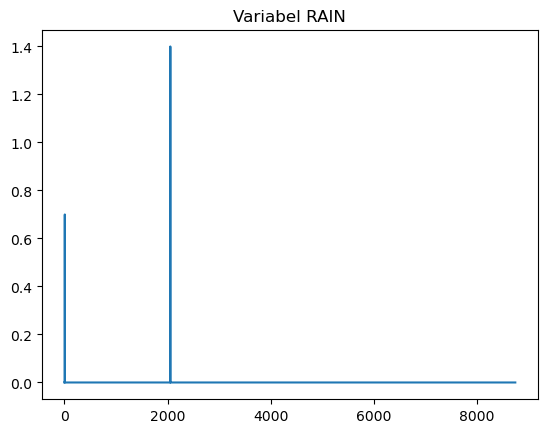

In [116]:
plt.plot(trangkil.index.values, trangkil['RAIN'])
plt.title("Variabel RAIN")
plt.show()

#### 3.1.2 Variabel RAIN (1-5)
Berikut adalah visualisasi dari data pada kolom ```RAIN (1-5)```.

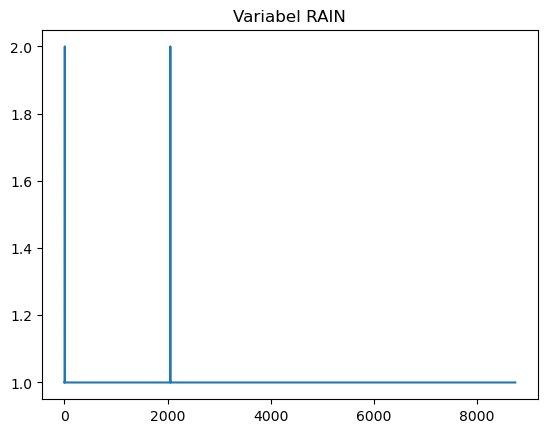

In [117]:
plt.plot(trangkil.index.values, trangkil['RAIN (1-5)'])
plt.title("Variabel RAIN")
plt.show()

#### 3.1.3 Variabel CO
Berikut adalah visualisasi dari data pada kolom ```CO```.

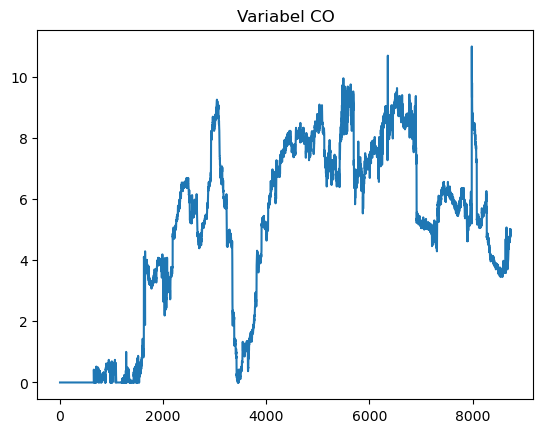

In [118]:
plt.plot(trangkil.index.values, trangkil['CO'])
plt.title("Variabel CO")
plt.show()

#### 3.1.4 Variabel CO2
Berikut adalah visualisasi dari data pada kolom ```CO2```.

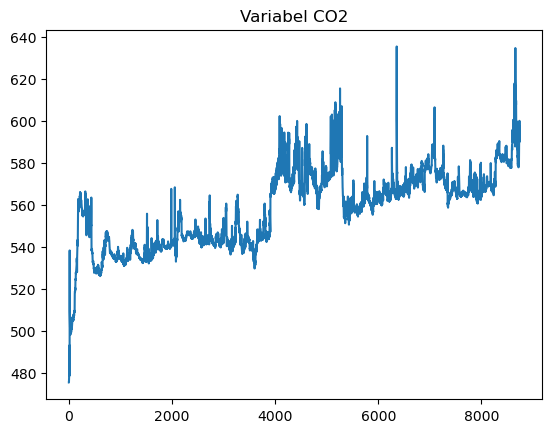

In [119]:
plt.plot(trangkil.index.values, trangkil['CO2'])
plt.title("Variabel CO2")
plt.show()

#### 3.1.5 Variabel SUHU
Berikut adalah visualisasi dari data pada kolom ```SUHU```.

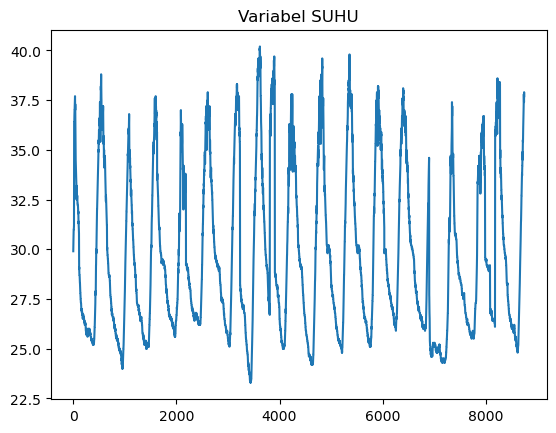

In [120]:
plt.plot(trangkil.index.values, trangkil['SUHU'])
plt.title("Variabel SUHU")
plt.show()

#### 3.1.6 Variabel HUMIDITY
Berikut adalah visualisasi dari data pada kolom ```HUMIDITY```.

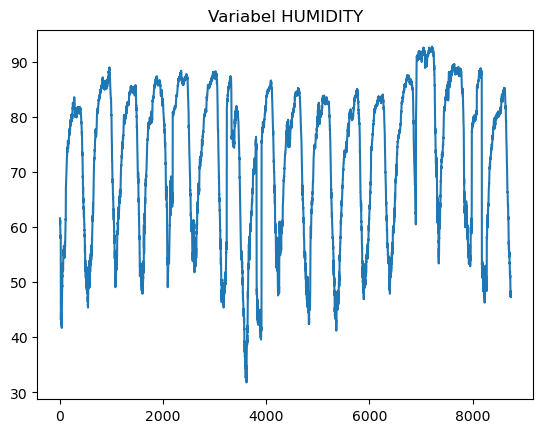

In [121]:
plt.plot(trangkil.index.values, trangkil['HUMIDITY'])
plt.title("Variabel HUMIDITY")
plt.show()

#### 3.1.7 Variabel WindKm
Berikut adalah visualisasi dari data pada kolom ```WindKm```.

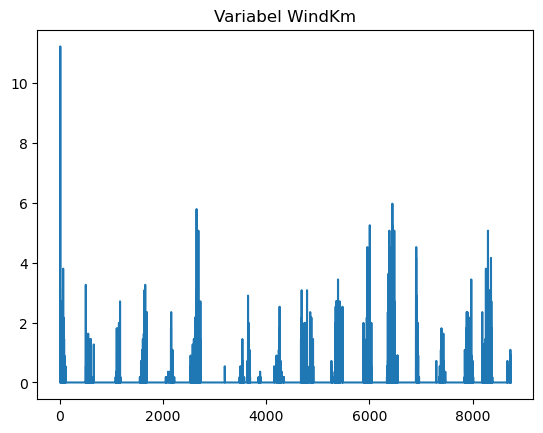

In [122]:
plt.plot(trangkil.index.values, trangkil['WindKm'])
plt.title("Variabel WindKm")
plt.show()

#### 3.1.8 Variabel CO2_2
Berikut adalah visualisasi dari data pada kolom ```CO2_2```.

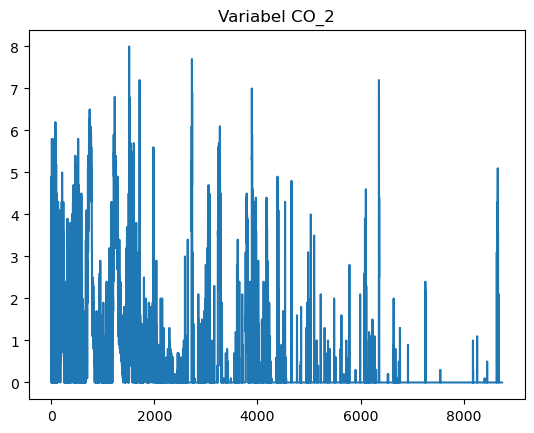

In [123]:
plt.plot(trangkil.index.values, trangkil['CO_2'])
plt.title("Variabel CO_2")
plt.show()

#### 3.1.9 Variabel NH3_2
Berikut adalah visualisasi dari data pada kolom ```NH3_2```.

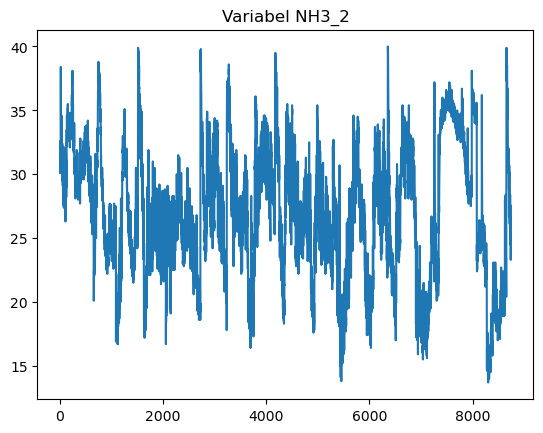

In [124]:
plt.plot(trangkil.index.values, trangkil['NH3_2'])
plt.title("Variabel NH3_2")
plt.show()

#### 3.1.10 Variabel NO2_2
Berikut adalah visualisasi dari data pada kolom ```NO2_2```.

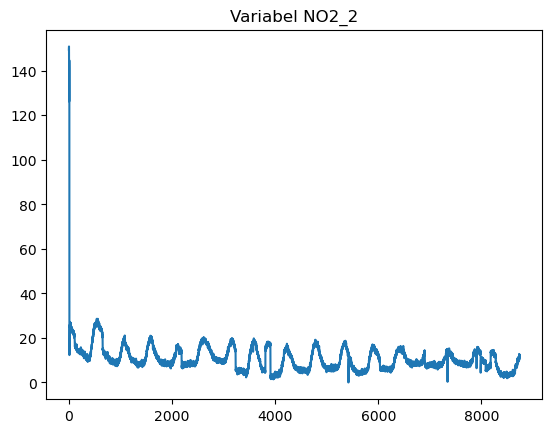

In [125]:
plt.plot(trangkil.index.values, trangkil['NO2_2'])
plt.title("Variabel NO2_2")
plt.show()

#### 3.1..11 Variabel PM2.5
Berikut adalah visualisasi dari data pada kolom ```PM2.5```.

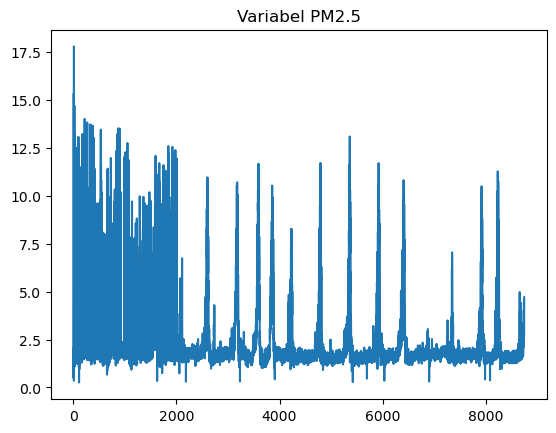

In [126]:
plt.plot(trangkil.index.values, trangkil['PM2.5'])
plt.title("Variabel PM2.5")
plt.show()

#### 3.1.12 Variabel PM2.5 (1-5)
Berikut adalah visualisasi dari data pada kolom ```PM2.5 (1-5)```.

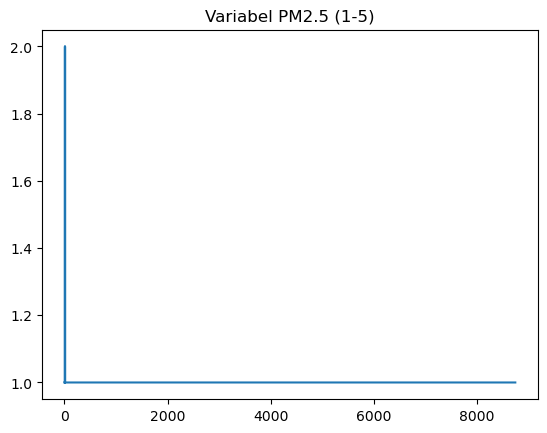

In [127]:
plt.plot(trangkil.index.values, trangkil['PM2.5 (1-5)'])
plt.title("Variabel PM2.5 (1-5)")
plt.show()

#### 3.1.13 Variabel Adc CO
Berikut adalah visualisasi dari data pada kolom ```Adc CO```.

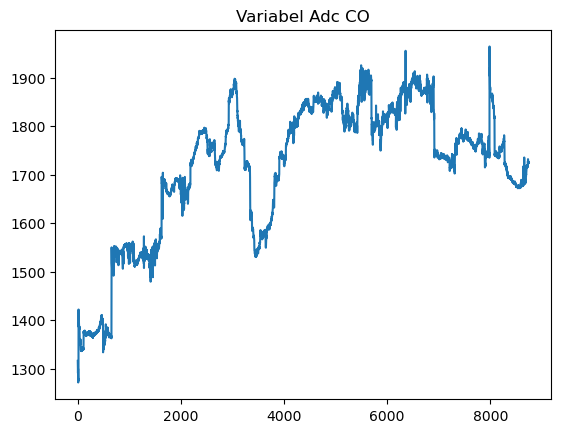

In [128]:
plt.plot(trangkil.index.values, trangkil['Adc CO'])
plt.title("Variabel Adc CO")
plt.show()

#### 3.1.14 Variabel Adc NH3
Berikut adalah visualisasi dari data pada kolom ```Adc NH3```.

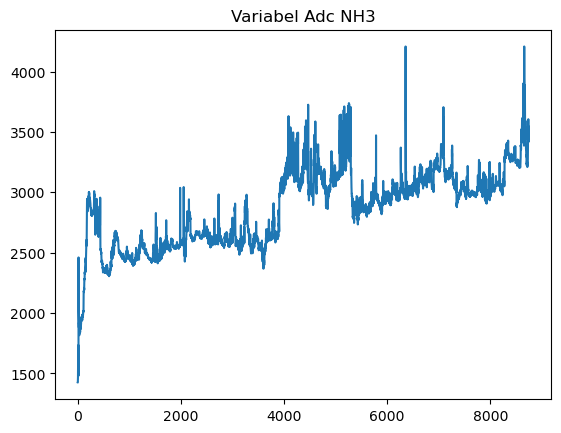

In [129]:
plt.plot(trangkil.index.values, trangkil['Adc NH3'])
plt.title("Variabel Adc NH3")
plt.show()

#### 3.1.15 Variabel Adc NO2
Berikut adalah visualisasi dari data pada kolom ```Adc NH2```.

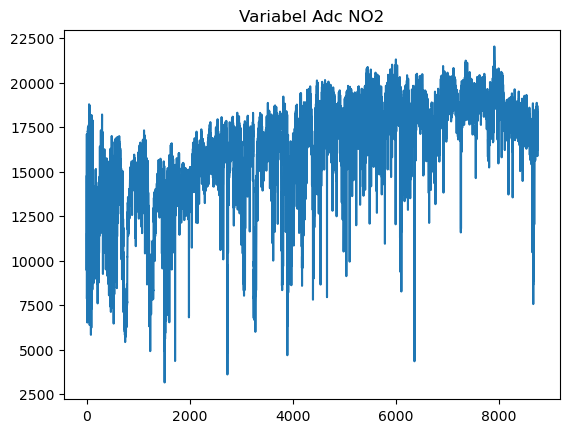

In [130]:
plt.plot(trangkil.index.values, trangkil['Adc NO2'])
plt.title("Variabel Adc NO2")
plt.show()

#### 3.1.16 Variabel Adc CO3
Berikut adalah visualisasi dari data pada kolom ```Adc CO3```.

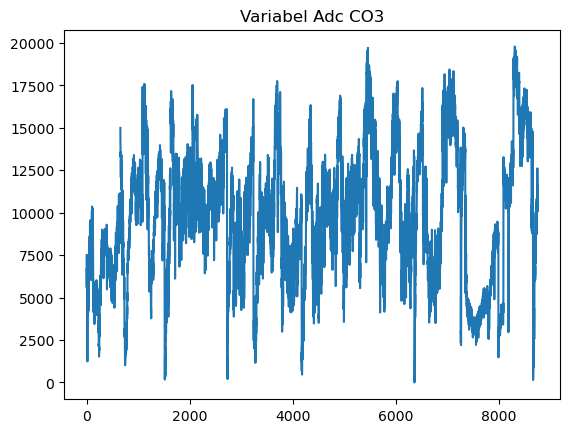

In [131]:
plt.plot(trangkil.index.values, trangkil['adc co3'])
plt.title("Variabel Adc CO3")
plt.show()

#### 3.1.17 Variabel adc CO2
Berikut adalah visualisasi dari data pada kolom ```adc CO2```.

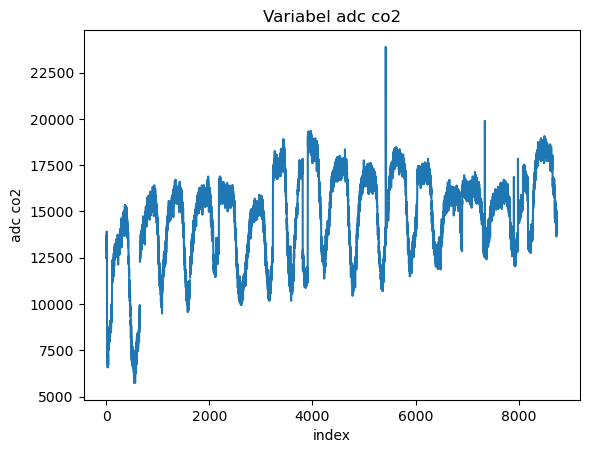

In [132]:
plt.plot(trangkil.index.values, trangkil['adc co2'])
plt.title("Variabel adc co2")
plt.xlabel("index")
plt.ylabel("adc co2")
plt.show()

## 4. Korelasi Antar Variabel
Metode Korelasi Pearson digunakan dalam penelitian ini.

### 4.1 Membuat DataFrame Khusus Korelasi
Tidak semua data pada _DataFrame_ sebelumnya bisa dicari korelasinya. Perlu dibuat _DataFrame_ baru untuk menampung kolom yang diperlukan.

#### 4.1.1 Trangkil
Data pertama yang akan diproses adalah data WSN dari kawasan Trangkil.

In [133]:
data_trangkil = trangkil[[
    'RAIN', 'RAIN (1-5)', 'CO', 'CO2', 'SUHU', 'HUMIDITY', 
    'WindKm', 'CO_2', 'NH3_2', 'NO2_2', 'PM2.5', 'PM2.5 (1-5)']]

##### 4.1.1.1 Menampilkan 5 Data Pertama
Sama seperti sebelumnya, fungsi ```head()``` digunakan unutk menampilkan 5 data teratas.

In [134]:
data_trangkil.head()

,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5)
0,0.0,1,0.0,475.33,29.9,61.6,3.08,0.3,31.2,149.5,1.86,1
1,0.0,1,0.0,475.33,30.0,61.2,0.00,3.8,32.6,150.6,0.52,1
2,0.0,1,0.0,475.96,30.3,60.6,0.00,2.3,30.9,150.9,1.58,1
3,0.0,1,0.0,477.16,30.4,61.3,0.00,0.0,30.1,144.1,1.57,1
4,0.0,1,0.0,477.85,30.5,60.5,0.00,0.0,30.4,139.4,1.53,1


##### 4.1.1.2 Menampilkan Keterangan Data
Sama seperti sebelumnya, fungsi ```tail()``` digunakan unutk menampilkan 5 data teratas.

In [135]:
data_trangkil.tail()

,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5)
8740,0.0,1,4.89,591.73,37.4,47.3,0.90,0.0,23.3,11.4,4.56,1
8741,0.0,1,4.84,594.66,37.4,47.6,0.18,0.0,24.2,12.4,2.67,1
8742,0.0,1,4.92,590.01,37.7,47.8,0.18,0.0,24.7,11.2,3.00,1
8743,0.0,1,4.84,597.25,37.9,47.3,0.18,0.0,26.7,12.2,3.93,1
8744,0.0,1,4.92,590.59,37.7,47.8,0.00,0.0,25.5,12.4,4.71,1


### 4.2 Heatmap Korelasi
_Heatmap_ digunakan untuk memvisualisasikan korelasi antar variabel.

#### 4.2.1 Trangkil
Data pertama yang akan kita proses adalah data WSN dari kawasan Trangkil.

In [136]:
data_trangkil.corr().style.background_gradient(cmap='coolwarm')

,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5)
RAIN,1.000000,0.948672,-0.015847,-0.014030,0.006179,-0.010558,-0.002915,0.008214,-0.011656,0.099922,-0.005082,-0.000217
RAIN (1-5),0.948672,1.000000,-0.018788,-0.026568,0.006085,-0.012443,-0.003072,0.016004,-0.005659,0.155876,-0.005456,-0.000229
CO,-0.015847,-0.018788,1.000000,0.609975,0.028595,0.098241,0.048230,-0.385431,-0.034795,-0.273216,-0.117073,-0.025039
CO2,-0.014030,-0.026568,0.609975,1.000000,-0.181324,0.238301,0.000745,-0.238418,-0.040542,-0.474787,-0.168731,-0.061431
SUHU,0.006179,0.006085,0.028595,-0.181324,1.000000,-0.956046,0.207917,-0.079993,-0.101027,0.556329,0.425355,0.004981
HUMIDITY,-0.010558,-0.012443,0.098241,0.238301,-0.956046,1.000000,-0.190227,0.048371,0.120687,-0.569555,-0.423915,-0.016441
WindKm,-0.002915,-0.003072,0.048230,0.000745,0.207917,-0.190227,1.000000,-0.037395,-0.139232,0.184481,0.072712,-0.003072
CO_2,0.008214,0.016004,-0.385431,-0.238418,-0.079993,0.048371,-0.037395,1.000000,0.386644,0.118602,0.051735,0.029777
NH3_2,-0.011656,-0.005659,-0.034795,-0.040542,-0.101027,0.120687,-0.139232,0.386644,1.000000,0.078253,0.048176,0.011425
NO2_2,0.099922,0.155876,-0.273216,-0.474787,0.556329,-0.569555,0.184481,0.118602,0.078253,1.000000,0.282723,0.005494


Visualisasi _Heatmap_ dibuat menggunakan gabungan _module_ ```Matplotlib``` dan ```Seaborn```.

<AxesSubplot:>

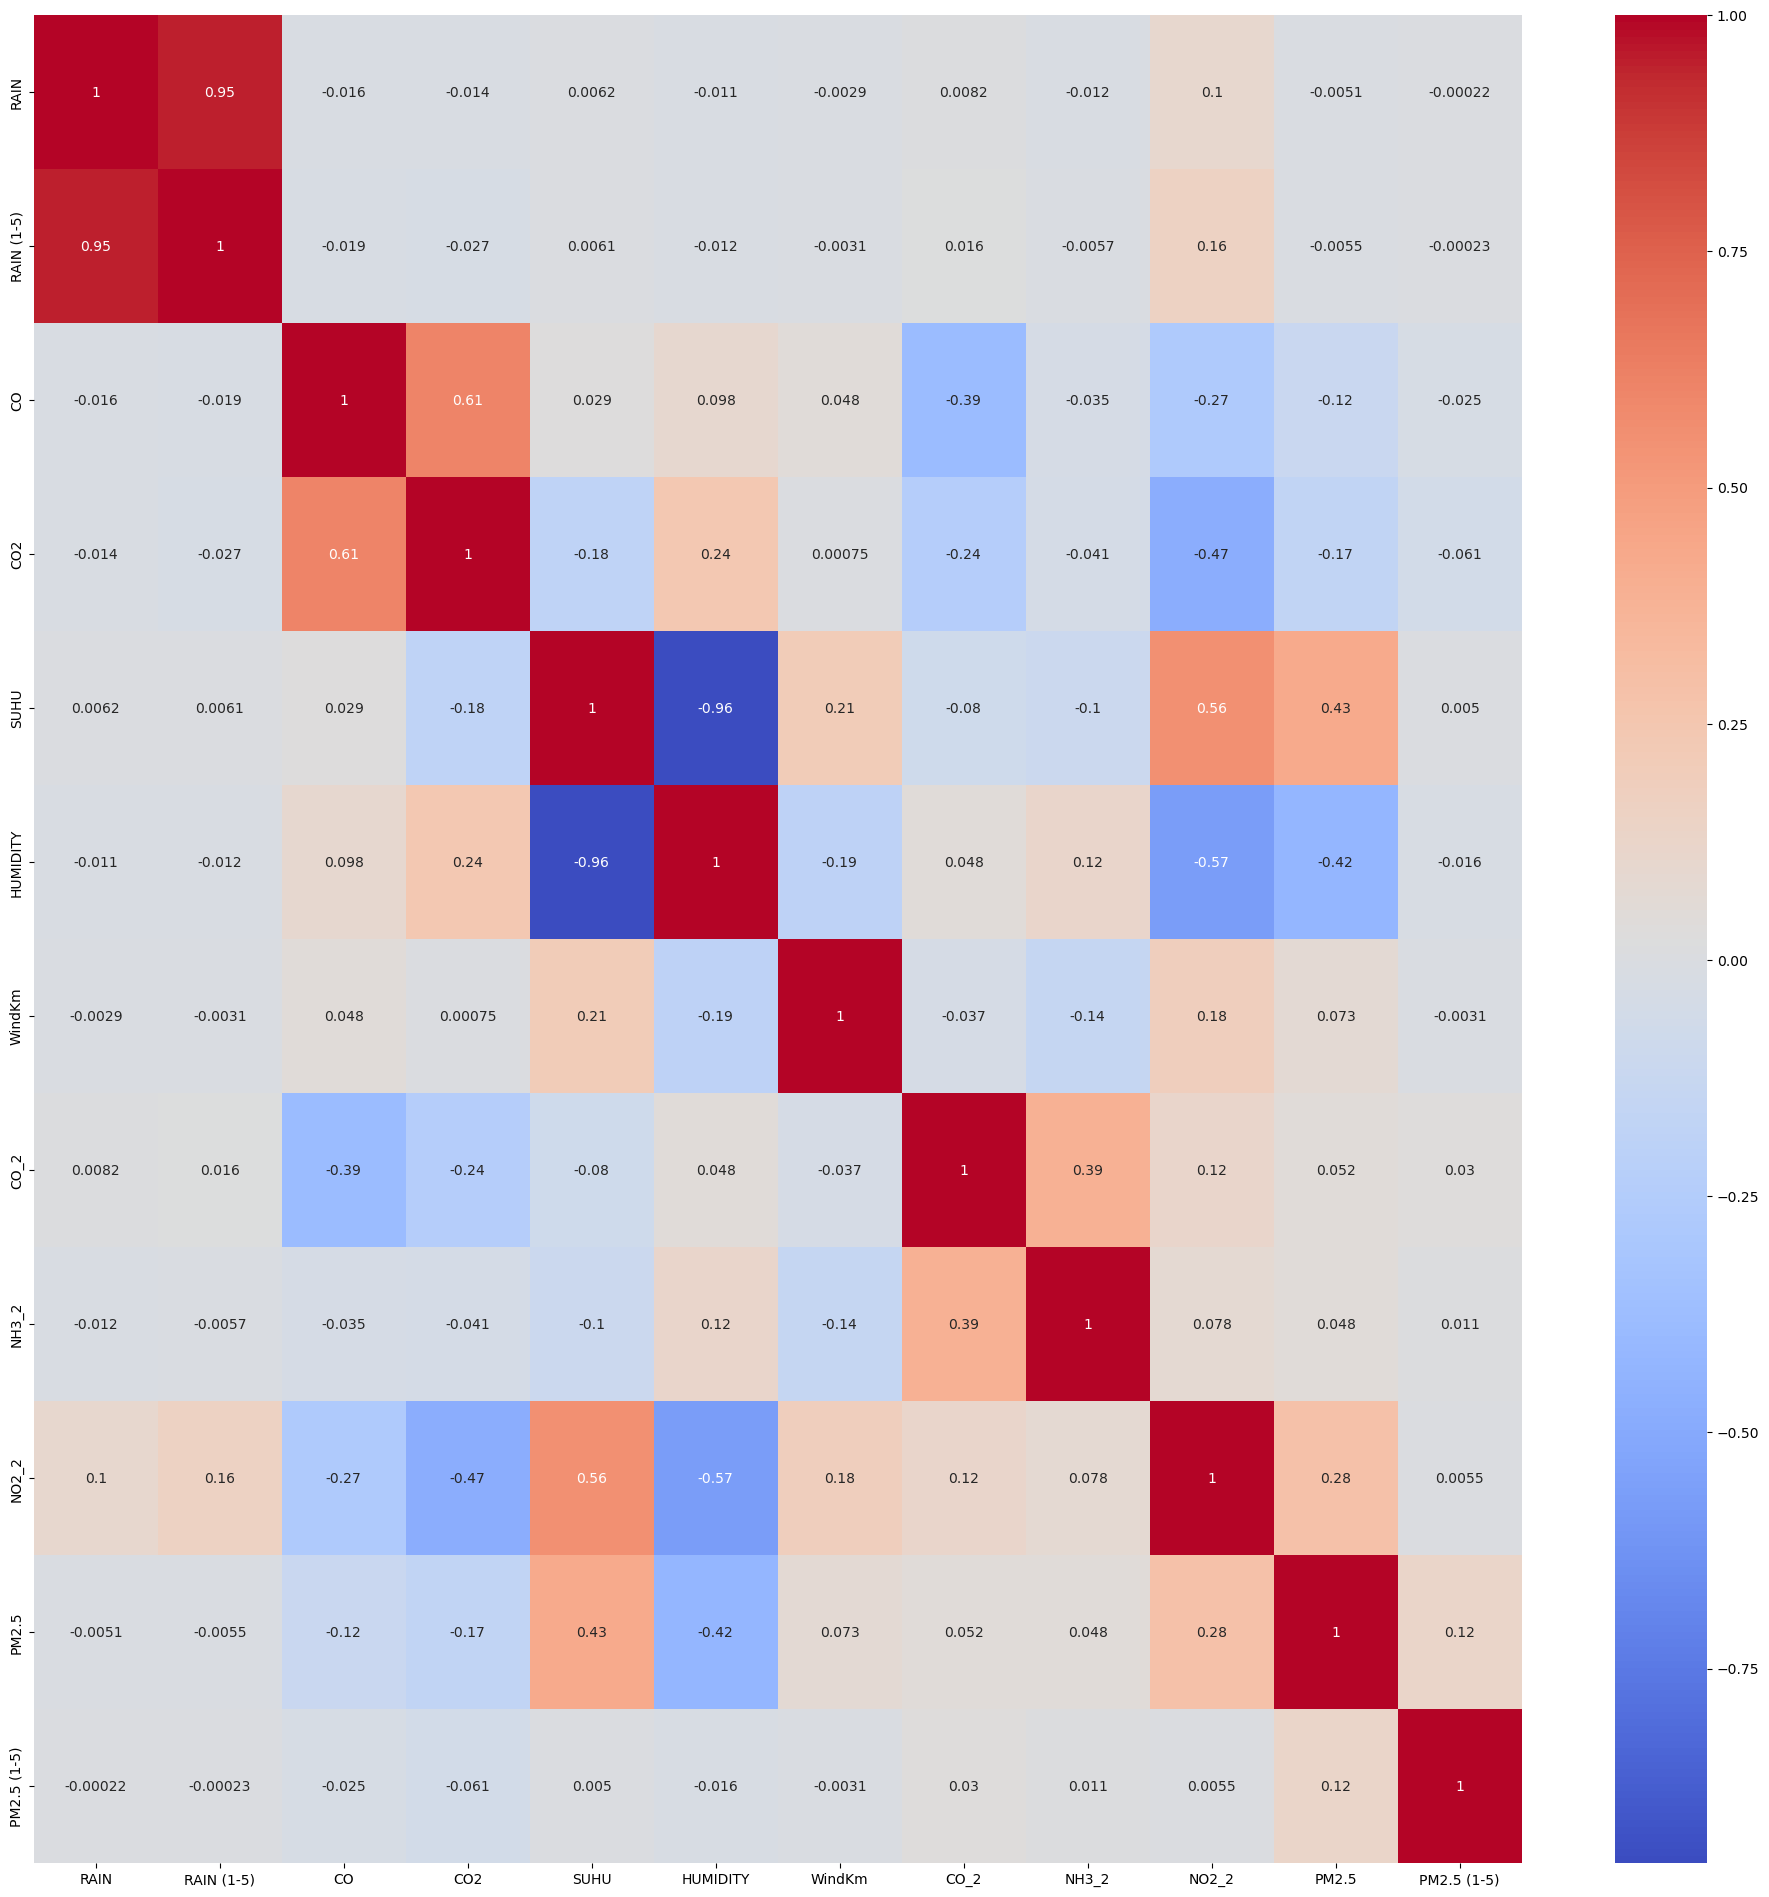

In [137]:
plt.figure(figsize=(24,24))
sns.heatmap(data_trangkil.corr(), annot=True, cmap='coolwarm')

### 4.2 Pairplot Korelasi
_Pairplot_ digunakan untuk memetakan korelasi antar variabel.

#### 4.2.1 Trangkil
Data pertama yang akan diproses adalah data WSN dari kawasan Trangkil.

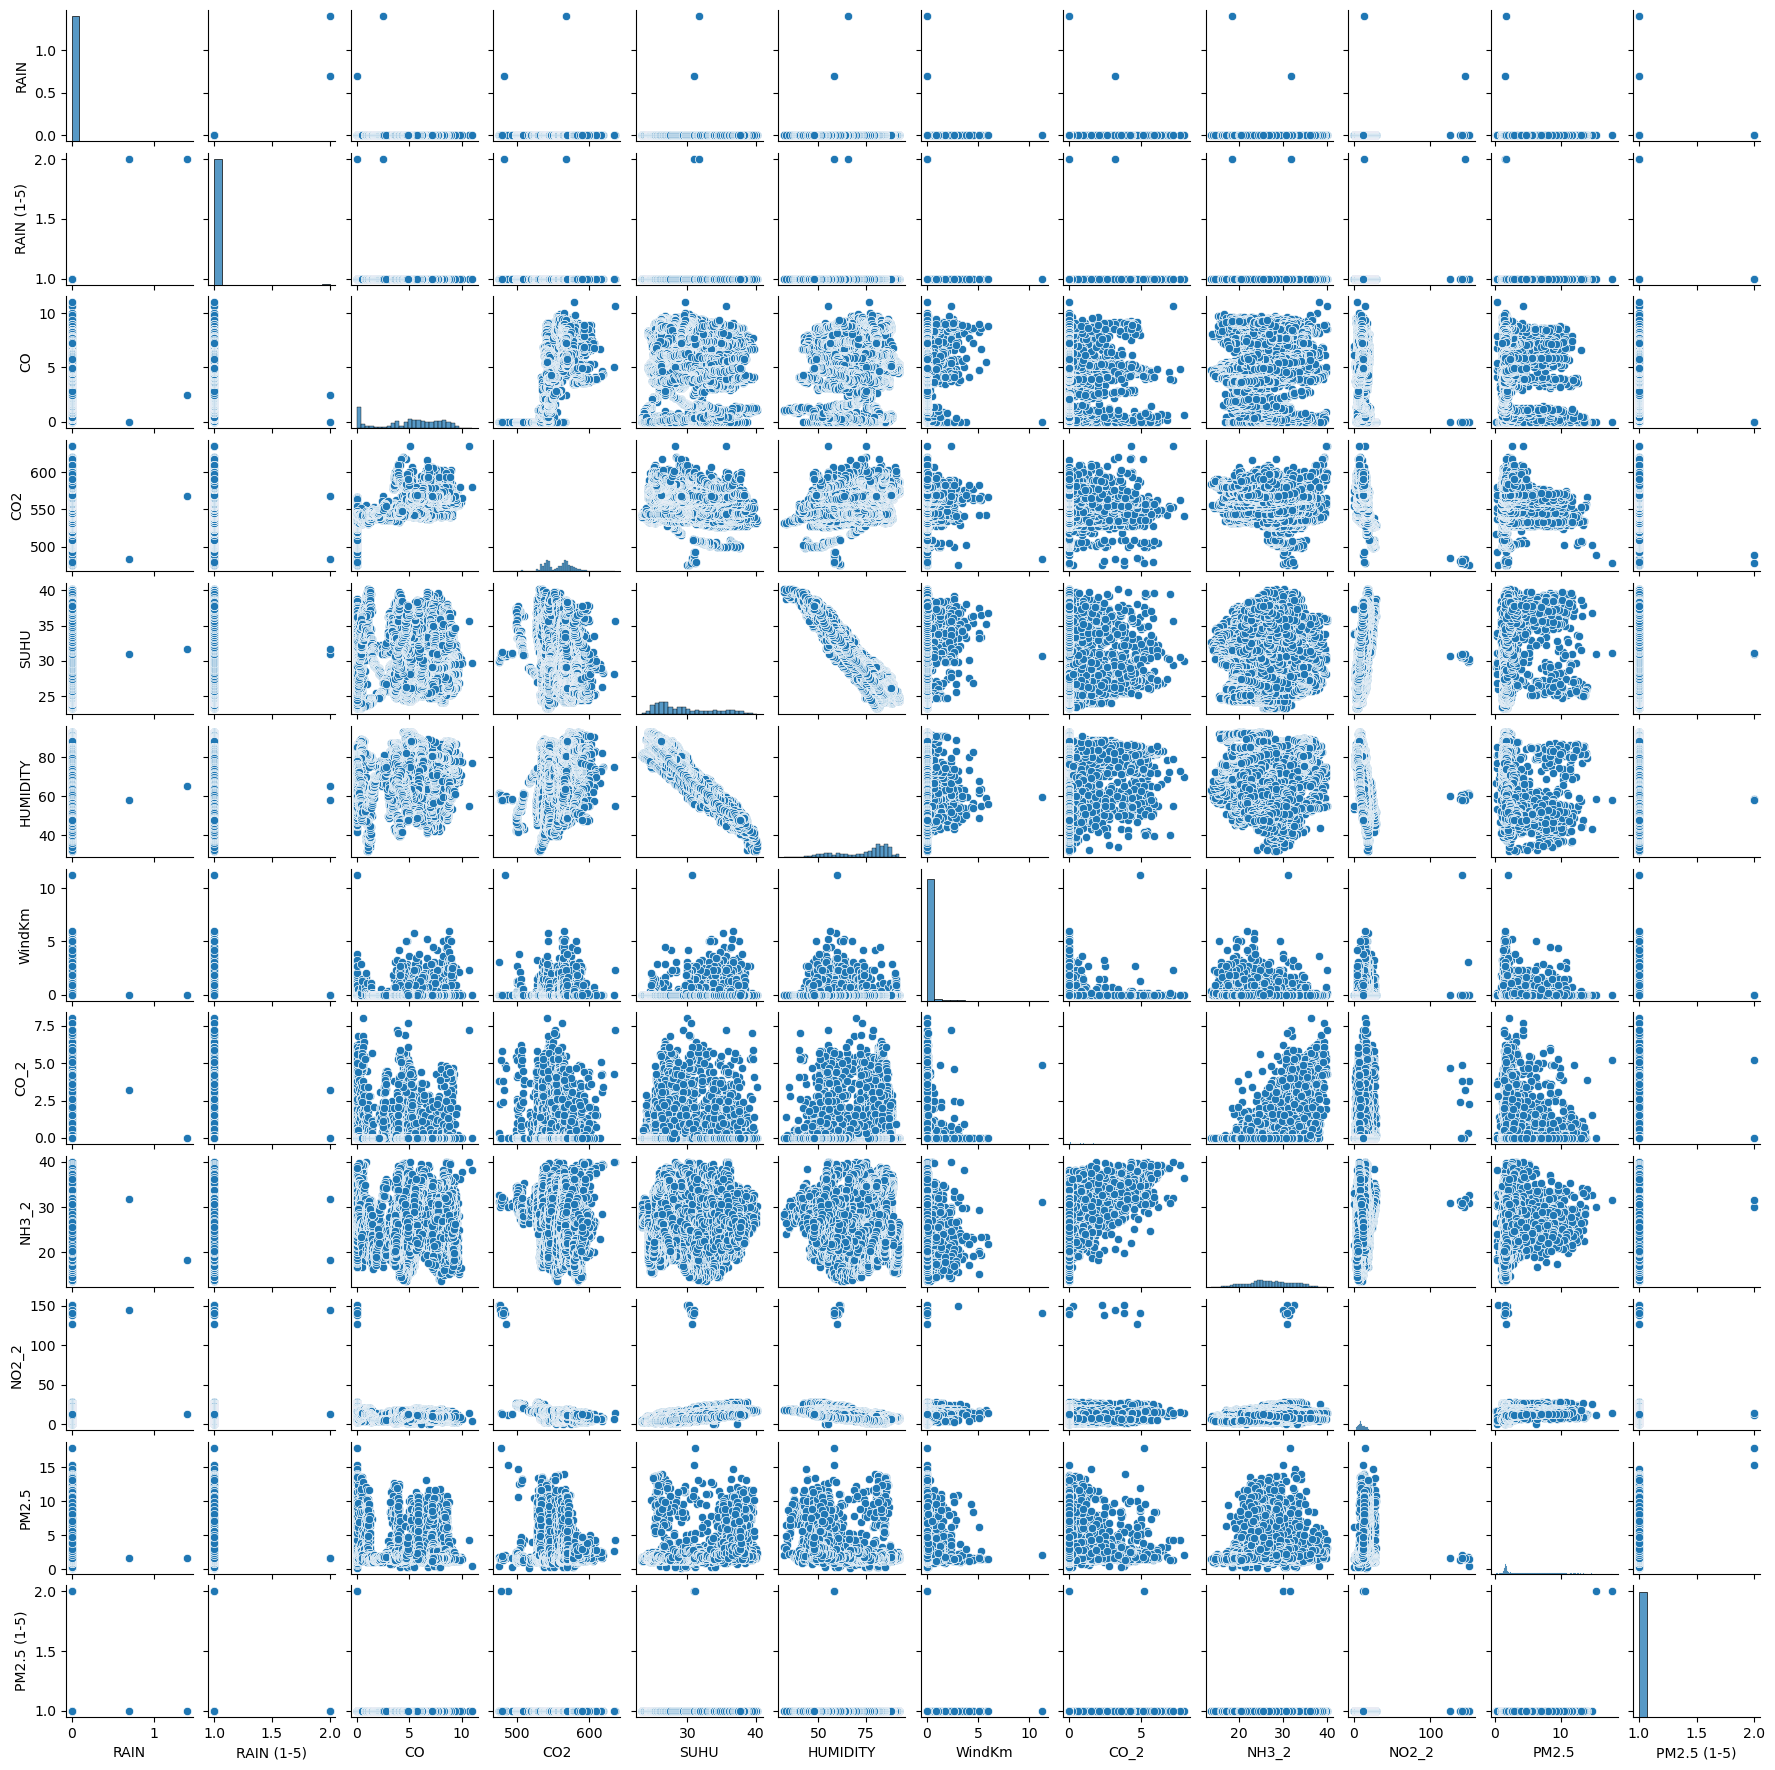

In [138]:
pair_trangkil = data_trangkil.dropna()
pair_trangkil.to_excel('pairplot_trangkil.xlsx')
sns.pairplot(pair_trangkil, height=1.5)

## 5. Regresi Linear

### 5.1 Trangkil

#### 5.1.1 Variabel RAIN

In [139]:
data_trangkil_RAIN = pd.DataFrame(data_trangkil['RAIN'], columns=['RAIN'])
data_trangkil_RAIN.reset_index(inplace=True)

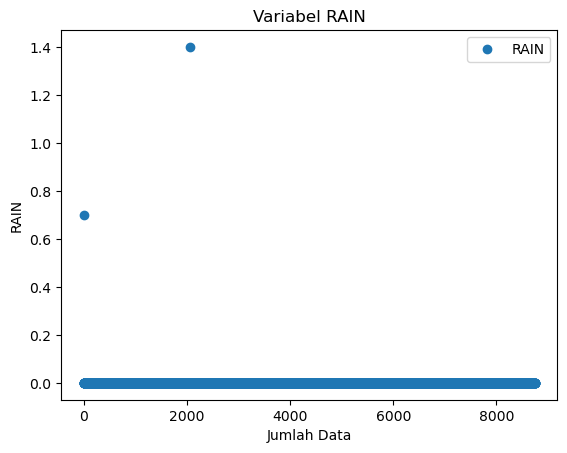

In [140]:
data_trangkil_RAIN.plot(x="index", y="RAIN", style="o")
plt.title("Variabel RAIN")
plt.xlabel("Jumlah Data")
plt.ylabel("RAIN")
plt.show()

In [141]:
x = data_trangkil_RAIN.iloc[:, :-1].values
y = data_trangkil_RAIN.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({"Data Real" : y_test, "Data Prediksi" : y_pred})
df_output

,Data Real,Data Prediksi
0,0.0,0.000640
1,0.0,0.000009
2,0.0,0.000053
3,0.0,0.000738
4,0.0,0.000568
...,...,...
1744,0.0,-0.000115
1745,0.0,-0.000080
1746,0.0,-0.000144
1747,0.0,-0.000055


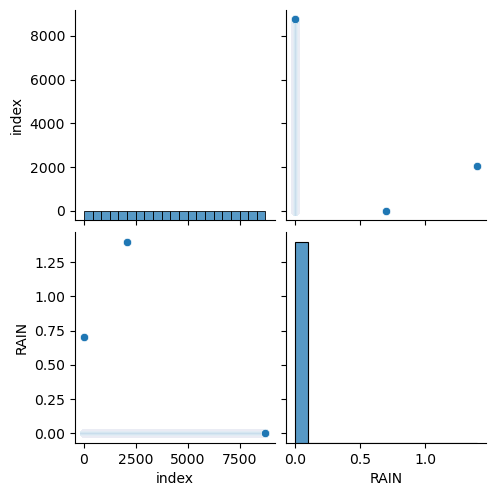

In [142]:
sns.pairplot(data_trangkil_RAIN)

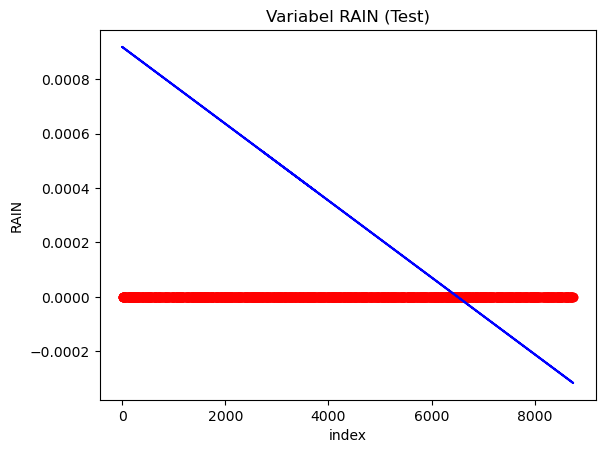

In [143]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.title("Variabel RAIN (Test)")
plt.xlabel("index")
plt.ylabel("RAIN")
plt.show()

In [152]:
umk = pd.read_excel("18 oktober Datalog Node 2 UMK.CSV.xlsx")
umk

,Date,Waktu,RAIN,RAIN (1-5),CO,CO2,SUHU,HUMIDITY,WindKm,CO_2,NH3_2,NO2_2,PM2.5,PM2.5 (1-5)
0,19/9/2022,15:30:17,NaN,0.0,1,17.87,413.97,37.0,43.8,0.00,7.3,0.0,1.8,-0.10
1,19/9/2022,15:34:55,NaN,0.0,1,14.61,414.43,36.4,44.0,0.00,9.9,0.0,5.7,-0.10
2,19/9/2022,15:35:26,NaN,0.0,1,9.65,414.02,36.4,44.9,0.00,9.1,0.0,5.3,-0.10
3,19/9/2022,15:37:21,NaN,0.0,1,7.12,413.16,36.2,45.3,0.00,8.6,0.0,4.7,9.20
4,19/9/2022,15:39:26,NaN,0.0,1,6.92,413.16,36.1,45.0,0.00,9.1,0.0,3.7,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600,18/10/2022,10:29:03,NaN,0.0,1,20.91,412.07,33.3,63.9,1.27,8.2,0.0,3.3,8.82
17601,18/10/2022,10:31:08,NaN,0.0,1,27.21,412.07,33.1,65.1,0.00,8.9,0.0,3.7,10.05
17602,18/10/2022,10:33:13,NaN,0.0,1,22.28,411.96,33.4,63.8,0.72,8.6,0.0,4.0,6.21
17603,18/10/2022,10:35:18,NaN,0.0,1,22.78,412.02,33.4,63.9,1.63,7.1,0.0,3.9,6.10


In [156]:
umk_RAIN = pd.DataFrame(umk['RAIN (1-5)'], columns=['RAIN (1-5)'])
umk_RAIN.reset_index(inplace=True)

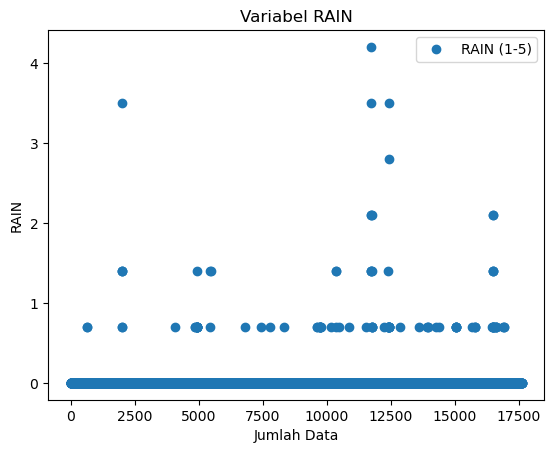

In [158]:
umk_RAIN.plot(x="index", y="RAIN (1-5)", style="o")
plt.title("Variabel RAIN")
plt.xlabel("Jumlah Data")
plt.ylabel("RAIN")
plt.show()

In [159]:
x = umk_RAIN.iloc[:, :-1].values
y = umk_RAIN.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({"Data Real" : y_test, "Data Prediksi" : y_pred})
df_output

,Data Real,Data Prediksi
0,0.0,0.009856
1,0.0,0.007602
2,0.0,0.005848
3,0.0,0.001908
4,0.0,0.008724
...,...,...
3516,0.0,0.009727
3517,0.0,0.002744
3518,0.0,0.009331
3519,0.0,0.009328


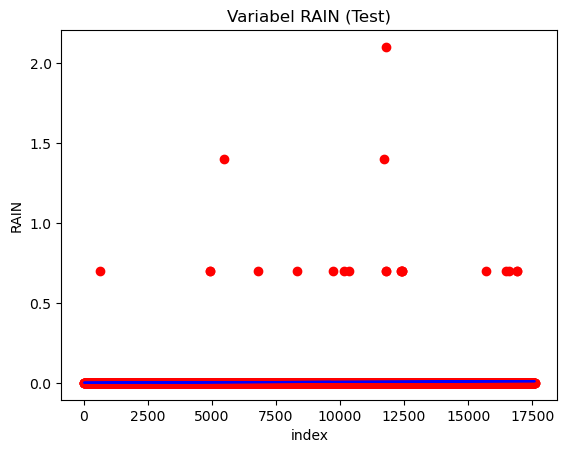

In [160]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.title("Variabel RAIN (Test)")
plt.xlabel("index")
plt.ylabel("RAIN")
plt.show()